In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from lr_finder import LRFinder
import models.cifar as models
from datasets import Dataset
from vogn import VOGN
import warnings
warnings.filterwarnings('ignore')

In [4]:
%load_ext autoreload
%autoreload 1
%aimport lr_finder

In [5]:
arch = 'resnet'
num_classes = 10
data = Dataset('cifar10')
batch_size = 128
test_batch_size = 128
trainloader = data.get_train_loader(batch_size=batch_size, shuffle=True)
testloader = data.get_test_loader(batch_size=test_batch_size, shuffle=True)
model = models.__dict__[arch](num_classes=num_classes, depth=20).cuda()

Files already downloaded and verified


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = VOGN(model, train_set_size=len(trainloader.dataset), lr=1e-5, prec_init=400, beta1=0.9, num_samples=1)
optimizer = optim.Adam(model.parameters(), lr=1e-8)
lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(trainloader, end_lr=1e2, num_iter=100, step_mode="exp")

{}


RuntimeError: CUDA out of memory. Tried to allocate 8.00 MiB (GPU 0; 7.94 GiB total capacity; 6.47 GiB already allocated; 1.06 MiB free; 767.50 KiB cached)

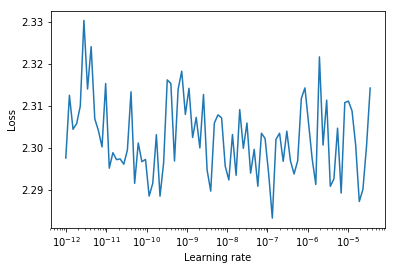

In [39]:
lr_finder.plot()

In [35]:
lr_finder.history['loss']

[8.105573654174805,
 6.706733703613281,
 10.866268157958984,
 10.10010814666748,
 7.684752464294434,
 9.672481536865234,
 13.667670249938965,
 8.848355293273926,
 8.399458885192871,
 11.691314697265625,
 10.31164836883545,
 6.57673454284668,
 6.749604225158691,
 11.51703929901123,
 10.159832000732422,
 10.238384246826172,
 12.303723335266113,
 7.178402900695801,
 8.051443099975586,
 7.835373878479004,
 8.353645324707031,
 13.029473304748535,
 8.500242233276367,
 7.5906147956848145,
 8.539196968078613,
 8.611770629882812,
 9.84471607208252,
 8.975958824157715,
 6.569973945617676,
 10.655771255493164,
 9.847808837890625,
 9.437917709350586,
 6.092323303222656,
 8.523171424865723,
 7.4844069480896,
 9.340725898742676,
 9.141522407531738,
 8.279064178466797,
 8.441780090332031,
 6.767571449279785,
 9.26848316192627,
 6.381438732147217,
 7.501368522644043,
 12.510406494140625,
 7.270412445068359,
 11.39531135559082,
 9.600838661193848,
 9.594863891601562,
 8.203003883361816,
 5.270793914794

In [14]:
lr_finder.optimizer.state

defaultdict(dict,
            {'mu': tensor([ 0.0150,  0.3818,  0.4222,  ..., -0.0143,  0.0083,  0.0036]),
             'mu_grad_avg': tensor([-1.0522e+07, -1.2559e+07, -1.3611e+07,  ..., -1.4890e+03,
                     -1.1918e+01, -2.7007e+03]),
             'Precision': tensor([1., 1., 1.,  ..., 1., 1., 1.])})